# Regresión Logística (Logistic Regression)
Katlyn Mackness <br>
17/12/2024 - Updated 26/02/2025

## Objetivo
Efectúes un análisis de clasificación mediante Regresión Logística que permita desarrollar un modelo predictivo basado en distintas métricas aplicadas a una base de datos grande.

## Problema
Imagina que eres un investigador médico que recopila datos para un estudio. Has recopilado datos sobre un conjunto de pacientes, todos ellos con la misma enfermedad. 

Durante su tratamiento, cada paciente ha respondido a uno de los 5 medicamentos:
* drugA
* drugB
* drugC
* drugX
* drugY

Parte de tu trabajo consiste en construir un modelo para averiguar qué medicamento podría ser apropiado para un futuro paciente con la misma enfermedad. Estudiar el fármaco al que respondió cada paciente. De manera particular para este problema, se requiere saber si el medicamento a aplicar es de origen nacional o extranjero.

In [1]:
# Importar bibliotécas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Cargue la base de datos “drugs.csv”
drugs = pd.read_csv("Data/drugs.csv")

# Etiqueta medicamentos con su origen 
# Nacional = 0
# Extranjero = 1
drug_map = {
    'drugA': 0, 
    'drugB': 0, 
    'drugC': 0, 
    'drugX': 1, 
    'drugY': 1
}

drugs['Origen'] = drugs['Drug'].map(drug_map)
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Origen
0,23,F,HIGH,HIGH,25.355,drugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,1
4,61,F,LOW,HIGH,18.043,drugY,1


In [3]:
feature_cols = ["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]
X = drugs[feature_cols].values
y = drugs.Origen

In [4]:
# Convertir las variables predictoras cualitativas a una escala numérica 
Cod_BP = preprocessing.LabelEncoder()
Cod_BP.fit(['HIGH', 'NORMAL', 'LOW'])
X[:,2] = Cod_BP.transform(X[:,2])

Cod_Cholesterol = preprocessing.LabelEncoder()
Cod_Cholesterol.fit(['HIGH', 'NORMAL'])
X[:,3] = Cod_Cholesterol.transform(X[:,3])

Cod_Sex = preprocessing.LabelEncoder()
Cod_Sex.fit(['F', 'M'])
X[:,1] = Cod_Sex.transform(X[:,1])

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

## Metodos de optimizacion
Use los diversos métodos de optimización para una Regresión Logística para encontrar un algoritmo óptimo de clasificación. 

In [5]:
# Crear grupos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
def model_optimizer(solver):
    """Solver function that prints the model coefficients, score and classification report"""
    model = LogisticRegression(solver=solver)
    clf = model.fit(X_train, y_train)

    # Prediccion de etiquetas de clase sobre datos de prueba
    y_pred = model.predict(X_test)
    
    # Impresion de coeficientes de la regresion de puntajes
    print("Solver = ", solver)
    print("\nIntercepto (Beta 0)", clf.intercept_)
    print("\nPesos (Betas)", clf.coef_)
    print("--------------------------------------------------")
    
    
    # Evaluaction de la precision del modelo
    score = model.score(X_test, y_test)
    print("Score de precision: ", score)
    print("--------------------------------------------------")
    
    # Reporte de clasificacion
    print(classification_report(y_test, y_pred))

In [7]:
model_optimizer("sag")

Solver =  sag

Intercepto (Beta 0) [-0.31429974]

Pesos (Betas) [[-0.03727263 -0.16208509  1.02539122  0.19887702  0.16037391]]
--------------------------------------------------
Score de precision:  0.9
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.88      1.00      0.94        30

    accuracy                           0.90        40
   macro avg       0.94      0.80      0.84        40
weighted avg       0.91      0.90      0.89        40



In [8]:
model_optimizer("newton-cg")

Solver =  newton-cg

Intercepto (Beta 0) [-11.15241978]

Pesos (Betas) [[0.00660784 0.14830208 3.33608807 2.07244305 0.63787222]]
--------------------------------------------------
Score de precision:  0.975
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        30

    accuracy                           0.97        40
   macro avg       0.98      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40



In [9]:
model_optimizer("liblinear")

Solver =  liblinear

Intercepto (Beta 0) [-3.34051275]

Pesos (Betas) [[-0.02834219 -0.26053256  2.06969328  1.09570978  0.27510142]]
--------------------------------------------------
Score de precision:  0.975
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        30

    accuracy                           0.97        40
   macro avg       0.98      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40



In [10]:
model_optimizer("saga")

Solver =  saga

Intercepto (Beta 0) [-0.14376954]

Pesos (Betas) [[-0.0336577  -0.09227979  0.66018572  0.10452648  0.15450633]]
--------------------------------------------------
Score de precision:  0.875
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.88      0.97      0.92        30

    accuracy                           0.88        40
   macro avg       0.87      0.78      0.81        40
weighted avg       0.87      0.88      0.87        40



In [11]:
model_optimizer("lbfgs")

Solver =  lbfgs

Intercepto (Beta 0) [-11.16791614]

Pesos (Betas) [[0.00667297 0.14894912 3.33863745 2.07461152 0.63862512]]
--------------------------------------------------
Score de precision:  0.975
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        30

    accuracy                           0.97        40
   macro avg       0.98      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40



### Conclusiones
Los algoritmos newton-cg, liblinear y lbfgs son igualmente efectivos. <br>

### Validación
Explique a detalle comentando sobre los indicadores obtenidos mediante el reporte de clasificación correspondiente y la curva ROC.

In [12]:
# Prediccion de probabilidades para casos particulares
model = LogisticRegression(solver="lbfgs")
clf = model.fit(X_train, y_train)
y_pred_probs = clf.predict_proba(X_test)[:,1]
y_pred_probs[0:5]

array([0.9898257 , 0.99974436, 0.99355295, 0.67717001, 0.99999695])

In [13]:
y_pred_probs = np.round(y_pred_probs,0)
y_pred_probs[0:5]

array([1., 1., 1., 1., 1.])

In [14]:
# Graficacion de la curva ROC y calculo del area bajo ella
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# fpr = false positive rate (tasa de falsos positivos)
# tpr = true positive rate (tasa de verdaderos positivos)
# thresholds = limites para valores de p
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
auc = roc_auc_score(y_test, y_pred_probs)

Text(0.5, 1.0, 'Curva ROC para Regresion Logistica')

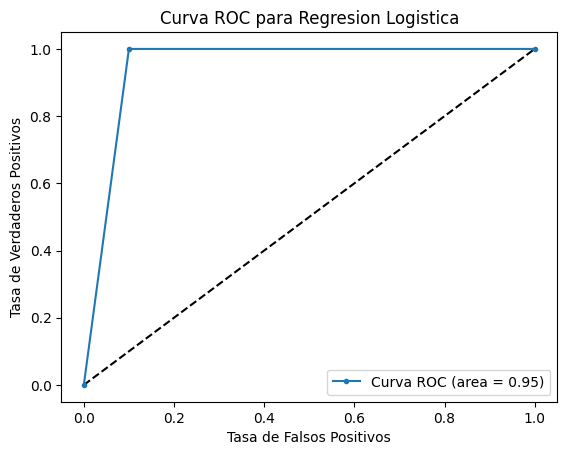

In [15]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, marker=".", label="Curva ROC (area = %0.2f)" % auc)
plt.xlabel("Tasa de Falsos Positivos") # False positive rate
plt.ylabel("Tasa de Verdaderos Positivos") # True positive rate
plt.legend(loc = "lower right")
plt.title("Curva ROC para Regresion Logistica")